In [50]:
#Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import os

import pickle

In [3]:
os.listdir(".")

['twitter-sentiment-analysis.ipynb', '.ipynb_checkpoints', 'Dataset']

In [4]:
data = pd.read_csv("/home/anshal/Work/ML⁄DL⁄NLP/NLP/Twitter_sentiment/Dataset/data.csv",encoding='latin',header=None)

In [5]:
columns = ["sentiment","id","date","quey","username","tweet"]
data.columns = columns

In [6]:
data.head()

,sentiment,id,date,quey,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
#missing values
data.isnull().sum()

sentiment    0
id           0
date         0
quey         0
username     0
tweet        0
dtype: int64

In [8]:
data["sentiment"] = data["sentiment"].replace([0.,4],["neg","pos"])

In [9]:
#distribution of target values
sen_un = data.sentiment.value_counts()
sen_un

neg    800000
pos    800000
Name: sentiment, dtype: int64

## EDA

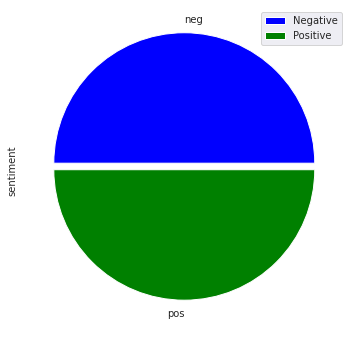

In [10]:
plt.figure(figsize=(6,6))
sen_un.plot(kind='pie',colors=["blue","green"],explode=[0.05,0])
plt.legend(["Negative","Positive"]);

In [11]:
data["len"] = data.tweet.str.split().apply(len)

In [12]:
data.head()

,sentiment,id,date,quey,username,tweet,len
0,neg,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
1,neg,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21
2,neg,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18
3,neg,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10
4,neg,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21


**Length of Tweets**

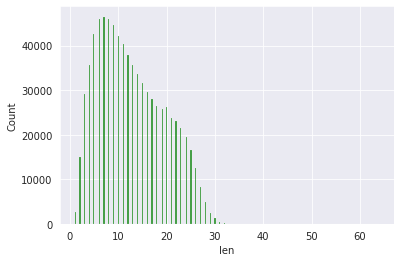

In [13]:
#positive tweet lengths
sns.histplot(data[data['sentiment'] == 'pos'].len,color='green');

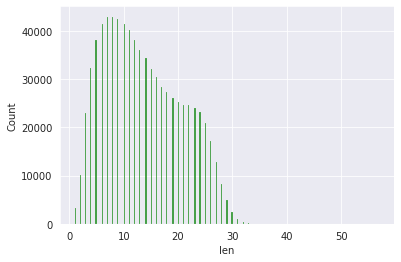

In [14]:
#negative tweet lenghts
sns.histplot(data[data['sentiment'] == 'neg'].len,color='green');

**Kinds of users**

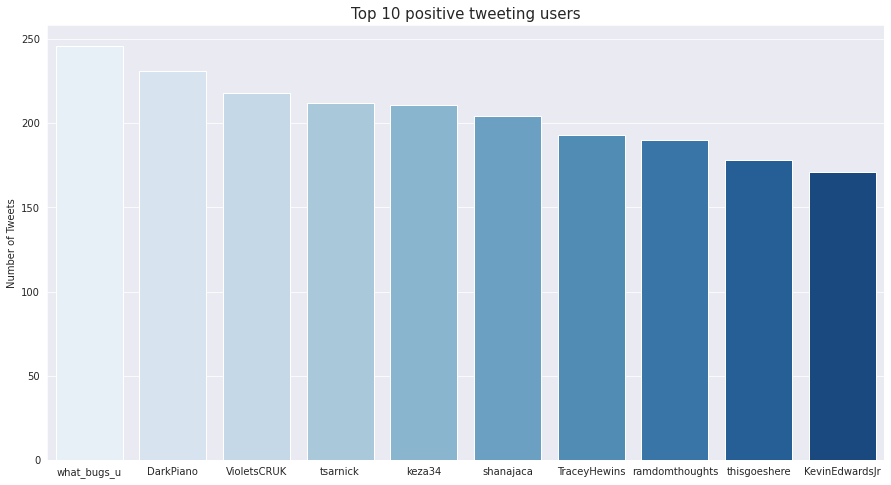

In [15]:
#Top 10 tweeting users(pos)
un_pos = data[data['sentiment']=='pos']['username'].value_counts()[:10]

plt.figure(figsize=(15,8)),
sns.barplot(x=un_pos.index,y=un_pos,palette='Blues')
plt.ylabel("Number of Tweets")
plt.title("Top 10 positive tweeting users",fontsize=15);

In [16]:
#lets have a look at what_bugs_u's tweets
data[data['username'] == "what_bugs_u"]["tweet"].iloc[:10]

1141441    @JadeMcCray why limit your story to 140 chr. T...
1141626    @cadmiumcannibal why limit your story to 140 c...
1141648    @RonanDosSantos why limit your story to 140 ch...
1141674    @ShayMac28 why limit your story to 140 chr. Te...
1142667    @lynnsdecor why limit your story to 140 chr. T...
1142790    @EmStar32 why limit your story to 140 chr. Tel...
1162939    @harry_matthews why limit your story to 140 ch...
1163802    @nhiies why limit your story to 140 chr. Tell ...
1163951    @Monza972 why limit your story to 140 chr. Tel...
1164024    @dropdeadkimi why limit your story to 140 chr....
Name: tweet, dtype: object

> So looks like this guy is a bot

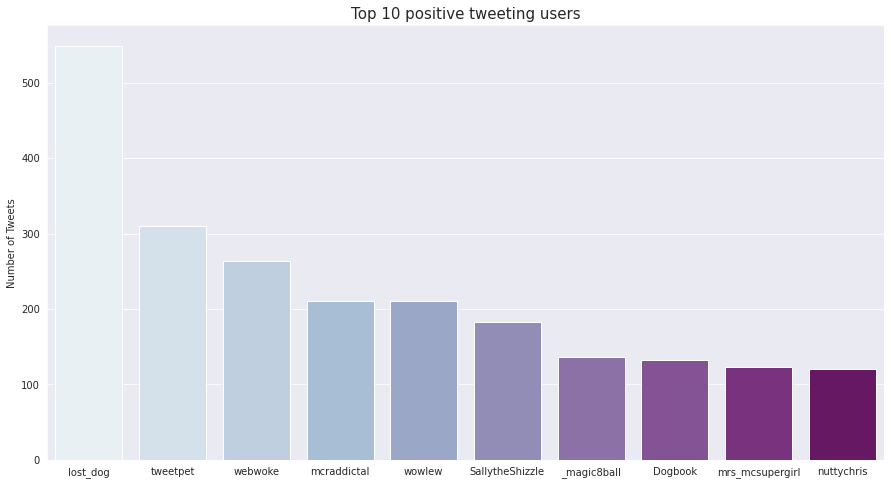

In [17]:
#top 10 negative tweeting users
un_neg = data[data['sentiment']=='neg']['username'].value_counts()[:10]

plt.figure(figsize=(15,8)),
sns.barplot(x=un_neg.index,y=un_neg,palette='BuPu')
plt.ylabel("Number of Tweets")
plt.title("Top 10 positive tweeting users",fontsize=15);

> Lost dog is on fire it seems

In [18]:
#lets have a look at what_bugs_u's tweets
data[data['username'] == "lost_dog"]["tweet"].iloc[:10]

43935    @NyleW I am lost. Please help me find a good h...
45574    @SallyD I am lost. Please help me find a good ...
46919    @zuppaholic I am lost. Please help me find a g...
47949    @LOSTPETUSA I am lost. Please help me find a g...
50572    @JeanLevertHood I am lost. Please help me find...
50854    @irenerencsi I am lost. Please help me find a ...
55096    @adevenish I am lost. Please help me find a go...
55656    @LAmale I am lost. Please help me find a good ...
60808    @bthenextstep I am lost. Please help me find a...
64297    @DonaldDonnyDon I am lost. Please help me find...
Name: tweet, dtype: object

> Another bot

In [20]:
from wordcloud import WordCloud,STOPWORDS

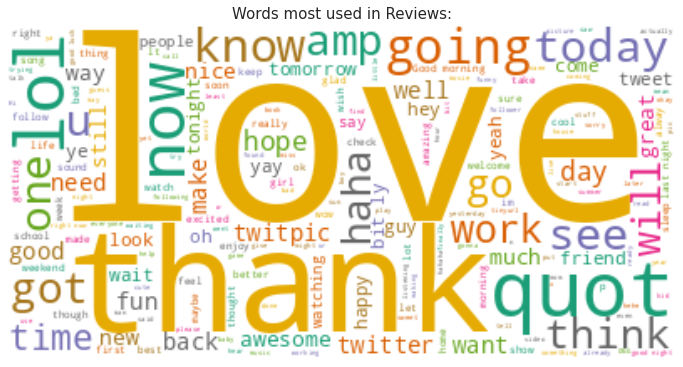

In [21]:
#positive word clouds


plt.figure(figsize=(12,10))

wc = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate("".join(data[data.sentiment=="pos"].tweet))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.title("Words most used in Reviews:",fontsize=15)
plt.show()

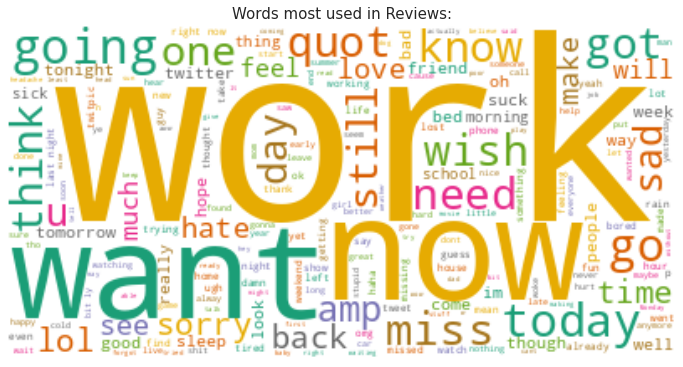

In [22]:
#negative word clouds


plt.figure(figsize=(12,10))

wc = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate("".join(data[data.sentiment=="neg"].tweet))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.title("Words most used in Reviews:",fontsize=15)
plt.show()

## Data Cleaning

In [23]:
df = data[["sentiment","tweet"]]
df.head()

,sentiment,tweet
0,neg,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,neg,is upset that he can't update his Facebook by ...
2,neg,@Kenichan I dived many times for the ball. Man...
3,neg,my whole body feels itchy and like its on fire
4,neg,"@nationwideclass no, it's not behaving at all...."


In [24]:
df.tweet.iloc[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [25]:
data = df['tweet']
target = df['sentiment']

print(data.shape,target.shape)

(1600000,) (1600000,)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
import re
import string

### Text cleaning

In [28]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [29]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [30]:
def clean(text, stem = False):
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"," ",str(text).lower().strip())
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [31]:
%%time
data_clean = data.apply(lambda x : clean(x))

CPU times: user 47.5 s, sys: 68.7 ms, total: 47.6 s
Wall time: 47.6 s


In [33]:
data_clean

0               awww bummer shoulda got david carr third day
1          upset update facebook texting might cry result...
2          dived many times ball managed save 50 rest go ...
3                           whole body feels itchy like fire
4                                           behaving mad see
                                 ...                        
1599995                        woke school best feeling ever
1599996             thewdb com cool hear old walt interviews
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: tweet, Length: 1600000, dtype: object

In [36]:
data_clean.to_pickle("Cleaned_data.pkl")

In [37]:
tfid = TfidfVectorizer(stop_words='english',max_df=0.7)

In [38]:
data_tfid = tfid.fit_transform(data_clean)

### Train/test split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(data_tfid,target,random_state=42,test_size=0.2)

In [41]:
print(x_train.shape,x_test.shape)

(1280000, 335150) (320000, 335150)


## Model

In [42]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [43]:
pac = PassiveAggressiveClassifier(max_iter=60)

In [44]:
#Train
pac.fit(x_train,y_train)

PassiveAggressiveClassifier(max_iter=60)

In [45]:
pac.score(x_train,y_train)*100

79.540859375

In [46]:
#test
pred = pac.predict(x_test)

In [47]:
#accuracy
print("Accuracy:",accuracy_score(pred,y_test)*100)

Accuracy: 72.5853125


In [48]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         neg       0.65      0.77      0.70    135227
         pos       0.80      0.70      0.75    184773

    accuracy                           0.73    320000
   macro avg       0.73      0.73      0.72    320000
weighted avg       0.74      0.73      0.73    320000



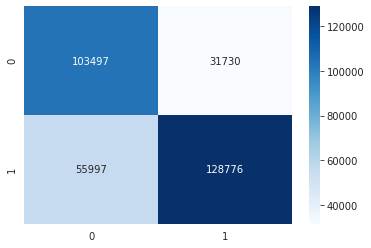

In [49]:
sns.heatmap(confusion_matrix(pred,y_test),annot = True, fmt = 'd', cmap = "Blues");